In [1]:
from copy import copy
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier

In [2]:
train_data = pd.read_csv('dataset/train.csv')
train_data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other,0
1,1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown,1
2,2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure,0
3,3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure,0
4,4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,0


In [3]:
test_data = pd.read_csv('dataset/test.csv')
test_data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0,35,technician,single,secondary,no,89043,no,no,cellular,7,feb,101,2,184,2,success
1,1,37,services,married,secondary,no,64372,yes,no,cellular,7,jul,158,3,241,0,unknown
2,2,31,services,single,secondary,no,31606,yes,no,unknown,15,may,152,2,47,0,unknown
3,3,31,admin.,married,secondary,no,94826,yes,no,cellular,27,may,345,2,490,0,unknown
4,4,32,services,married,secondary,no,100401,no,no,cellular,7,jan,126,1,686,0,other


In [4]:
train_df = copy(train_data)
x = copy(train_df)
test_df = copy(test_data)
all_df = pd.concat([x, test_df], ignore_index=True)

In [5]:
ID = test_data['id']

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27100 entries, 0 to 27099
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         27100 non-null  int64 
 1   age        27100 non-null  int64 
 2   job        27100 non-null  object
 3   marital    27100 non-null  object
 4   education  27100 non-null  object
 5   default    27100 non-null  object
 6   balance    27100 non-null  int64 
 7   housing    27100 non-null  object
 8   loan       27100 non-null  object
 9   contact    27100 non-null  object
 10  day        27100 non-null  int64 
 11  month      27100 non-null  object
 12  duration   27100 non-null  int64 
 13  campaign   27100 non-null  int64 
 14  pdays      27100 non-null  int64 
 15  previous   27100 non-null  int64 
 16  poutcome   27100 non-null  object
 17  y          27100 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 3.7+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18050 entries, 0 to 18049
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         18050 non-null  int64 
 1   age        18050 non-null  int64 
 2   job        18050 non-null  object
 3   marital    18050 non-null  object
 4   education  18050 non-null  object
 5   default    18050 non-null  object
 6   balance    18050 non-null  int64 
 7   housing    18050 non-null  object
 8   loan       18050 non-null  object
 9   contact    18050 non-null  object
 10  day        18050 non-null  int64 
 11  month      18050 non-null  object
 12  duration   18050 non-null  int64 
 13  campaign   18050 non-null  int64 
 14  pdays      18050 non-null  int64 
 15  previous   18050 non-null  int64 
 16  poutcome   18050 non-null  object
dtypes: int64(8), object(9)
memory usage: 2.3+ MB


# <時間>

In [8]:
print(pd.unique(x.month))
print(len(pd.unique(x.month)))

['nov' 'aug' 'may' 'apr' 'sep' 'jun' 'jul' 'feb' 'oct' 'jan' 'mar']
11


In [9]:
print(pd.unique(test_df.month))
print(len(pd.unique(test_df.month)))

['feb' 'jul' 'may' 'jan' 'jun' 'aug' 'apr' 'sep' 'nov' 'oct' 'mar']
11


In [10]:
month_dict = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, 
              "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}

x['month'] = x['month'].map(month_dict)
x['month'] = x['month'].map(int, month_dict)
test_df['month'] = test_df['month'].map(month_dict)
test_df['month'] = test_df['month'].map(int, month_dict)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


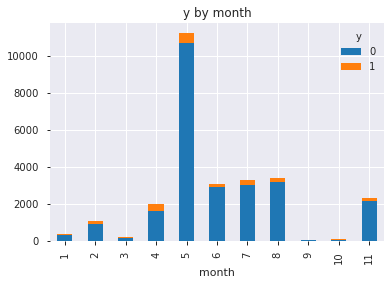

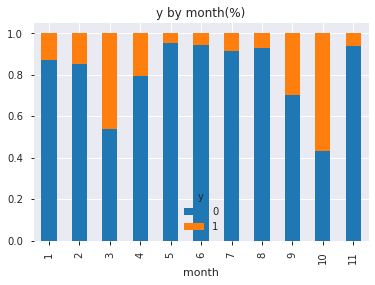

In [11]:
pd.crosstab(x.month, x.y).plot(kind='bar', stacked=True, title='y by month')
pd.crosstab(x.month, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by month(%)')

In [12]:
print(x['day'].value_counts())

27    4129
7     1919
18    1732
20    1693
16    1681
2     1495
15    1451
21    1328
17    1285
26    1172
30    1143
8     1142
12    1060
28    1044
4      872
3      806
13     618
6      502
14     435
9      376
11     324
23     268
5      199
19     140
22     124
25     116
29      38
10       4
31       3
1        1
Name: day, dtype: int64


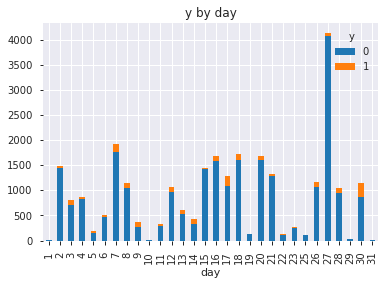

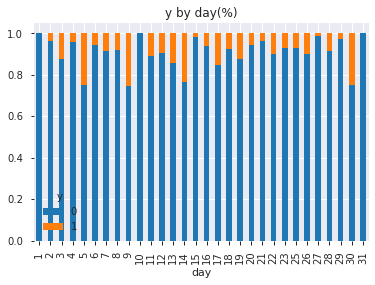

In [13]:
pd.crosstab(x.day, x.y).plot(kind='bar', stacked=True, title='y by day')
pd.crosstab(x.day, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by day(%)')

In [14]:
def month_div1(month):
    a = ''
    if month <= 3:
        a = 0
    elif month <= 6:
        a = 1
    elif month <= 9:
        a = 2
    else:
        a = 3
    return a

In [15]:
def month_div2(month):
    a = ''
    if month <= 4:
        a = 0
    elif month <= 8:
        a = 1
    else:
        a = 2
    return a

In [16]:
x['month_class'] = x['month'].map(month_div1)
test_df['month_class'] = test_df['month'].map(month_div1)

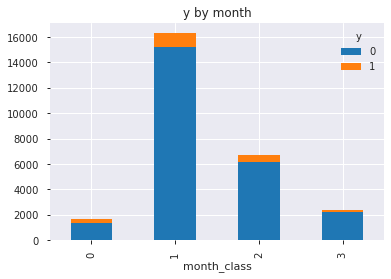

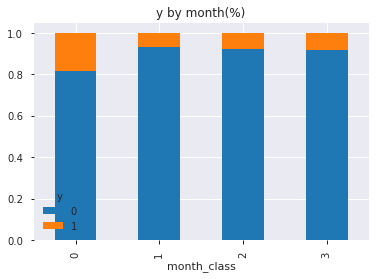

In [17]:
pd.crosstab(x.month_class, x.y).plot(kind='bar', stacked=True, title='y by month')
pd.crosstab(x.month_class, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by month(%)')

In [18]:
def day_div(day):
    a = ''
    if day <= 10:
        a = 0
    elif day <= 20:
        a = 1
    else:
        a =2
    return a

In [19]:
x['day_class'] = x['day'].map(day_div)
test_df['day_class'] = test_df['day'].map(day_div)

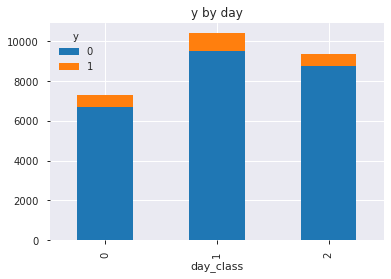

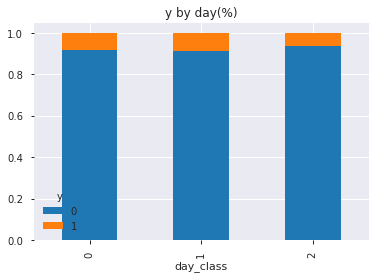

In [20]:
pd.crosstab(x.day_class, x.y).plot(kind='bar', stacked=True, title='y by day')
pd.crosstab(x.day_class, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by day(%)')

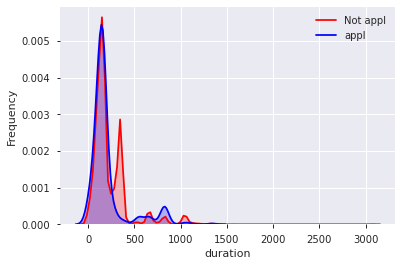

In [21]:
g = sns.kdeplot(x['duration'][x['y'] == 0], color='red', shade = True)
g = sns.kdeplot(x['duration'][x['y'] == 1], color='blue', shade = True)
g.set_xlabel('duration')
g.set_ylabel('Frequency')
g = g.legend(['Not appl','appl'])

In [22]:
tmp_x = copy(train_data)
tmp_test = copy(test_data)

x['duration'] = [sec // 60 for sec in tmp_x.duration]
tmp_test['duration'] = [sec // 60 for sec in tmp_test.duration]

del tmp_x, tmp_test

In [23]:
min_min = x['duration'].min()
min_max = x['duration'].max()

print('min:{}, max:{}'.format(min_min, min_max))

min:0, max:51


In [24]:
def duration_class(duration):
    a = ''
    if duration <= 0:
        a = 0
    elif duration <= 5:
        a = 1
    else:
        a = 2
    return a


In [25]:
x['duration_class'] = x['duration'].map(duration_class)
test_df['duration_class'] = test_df['duration'].map(duration_class)

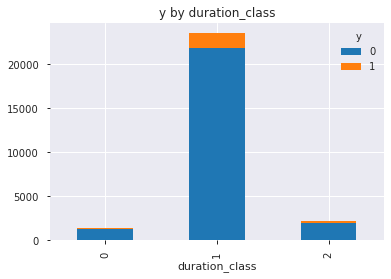

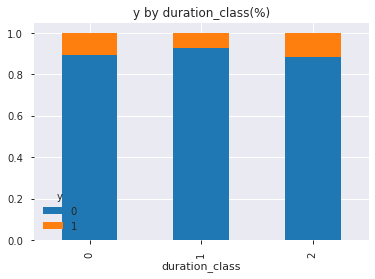

In [26]:
pd.crosstab(x.duration_class, x.y).plot(kind='bar', stacked=True, title='y by duration_class')
pd.crosstab(x.duration_class, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by duration_class(%)')

In [27]:
x['contact'].value_counts()

cellular     19147
unknown       6849
telephone     1104
Name: contact, dtype: int64

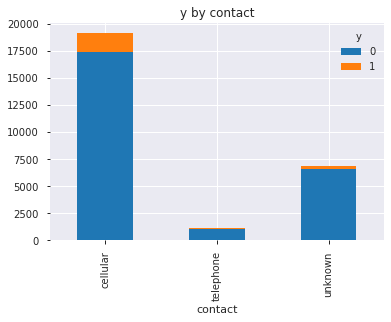

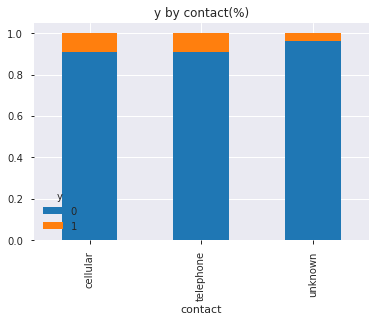

In [28]:
pd.crosstab(x.contact, x.y).plot(kind='bar', stacked=True, title='y by contact')
pd.crosstab(x.contact, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by contact(%)')

# <年齢>

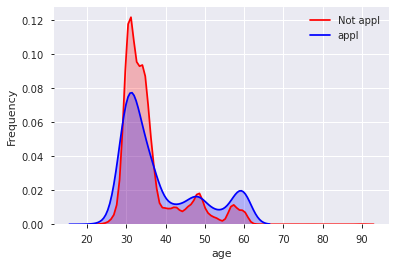

In [29]:
g = sns.kdeplot(x['age'][x['y'] == 0], color='red', shade = True)
g = sns.kdeplot(x['age'][x['y'] == 1], color='blue', shade = True)
g.set_xlabel('age')
g.set_ylabel('Frequency')
g = g.legend(['Not appl','appl'])

In [30]:
def age_class(age):
    a = ''
    if age <= 30:
        a = 0
    elif age <= 40:
        a = 1
    elif age <= 50:
        a = 2
    elif age <= 60:
        a = 3
    else:
        a = 4
    return a

In [31]:
x['age_class'] = x['age'].map(age_class)
test_df['age_class'] = test_df['age'].map(age_class)

In [32]:
x['age_class'].value_counts()

1    17257
0     4672
2     3062
3     2096
4       13
Name: age_class, dtype: int64

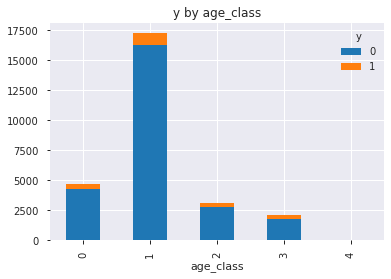

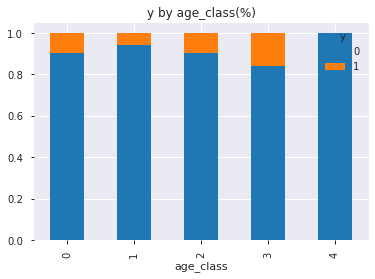

In [33]:
pd.crosstab(x.age_class, x.y).plot(kind='bar', stacked=True, title='y by age_class')
pd.crosstab(x.age_class, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by age_class(%)')

In [34]:
x[x['age_class'] == 4]

,id,age,job,marital,education,default,balance,housing,loan,contact,...,duration,campaign,pdays,previous,poutcome,y,month_class,day_class,duration_class,age_class
473,473,63,retired,single,secondary,no,97329,no,no,cellular,...,1,1,71,0,other,0,0,1,1,4
3107,3107,90,services,married,secondary,no,44991,yes,no,unknown,...,12,2,14,0,unknown,0,1,2,2,4
8135,8135,63,admin.,married,secondary,no,90661,yes,no,cellular,...,1,2,650,0,other,0,0,0,1,4
11633,11633,90,services,divorced,secondary,no,90530,no,no,unknown,...,10,2,668,0,unknown,0,1,2,2,4
12372,12372,90,entrepreneur,divorced,secondary,no,88889,yes,no,unknown,...,17,1,728,0,unknown,0,1,0,2,4
15568,15568,63,retired,divorced,primary,no,41553,yes,no,telephone,...,13,1,105,0,other,0,2,0,2,4
15752,15752,63,unemployed,married,secondary,no,68016,yes,no,unknown,...,2,2,610,0,unknown,0,1,2,1,4
17627,17627,77,retired,divorced,secondary,no,47614,no,no,cellular,...,0,1,307,0,failure,0,1,0,0,4
22065,22065,63,blue-collar,single,tertiary,no,9155,yes,no,cellular,...,2,1,598,0,other,0,1,0,1,4
22800,22800,73,technician,divorced,primary,no,61122,yes,no,unknown,...,12,2,831,0,unknown,0,1,2,2,4


# <平均残高>

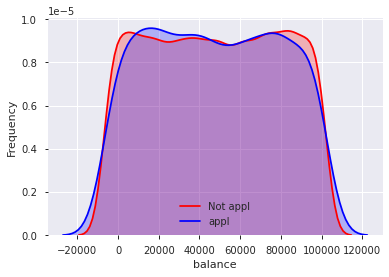

In [35]:
g = sns.kdeplot(x['balance'][x['y'] == 0], color='red', shade = True)
g = sns.kdeplot(x['balance'][x['y'] == 1], color='blue', shade = True)
g.set_xlabel('balance')
g.set_ylabel('Frequency')
g = g.legend(['Not appl','appl'])

# <ローンと債務不履行>

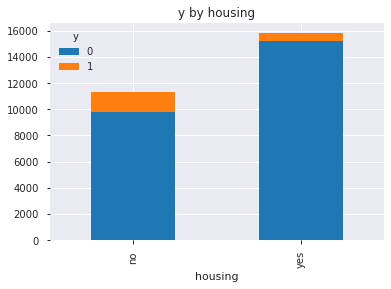

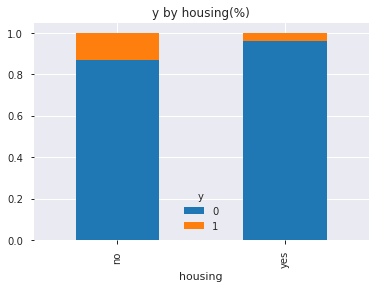

In [36]:
pd.crosstab(x.housing, x.y).plot(kind='bar', stacked=True, title='y by housing')
pd.crosstab(x.housing, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by housing(%)')

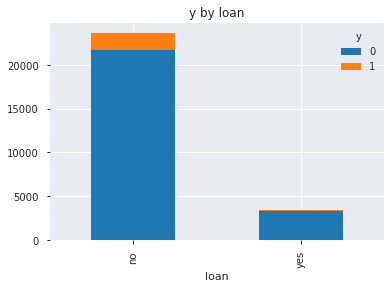

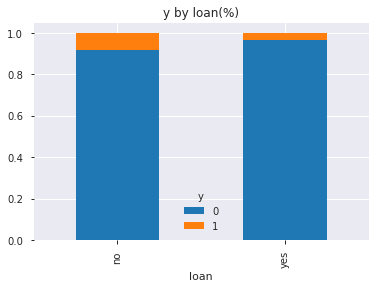

In [37]:
pd.crosstab(x.loan, x.y).plot(kind='bar', stacked=True, title='y by loan')
pd.crosstab(x.loan, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by loan(%)')

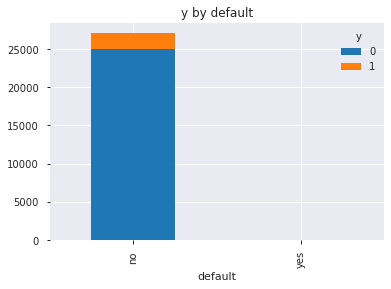

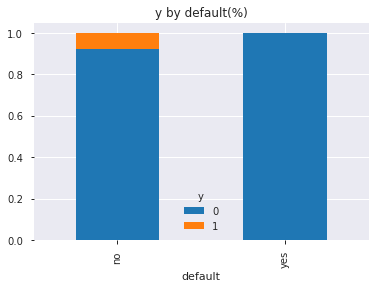

In [38]:
pd.crosstab(x.default, x.y).plot(kind='bar', stacked=True, title='y by default')
pd.crosstab(x.default, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by default(%)')

# <ステータス>

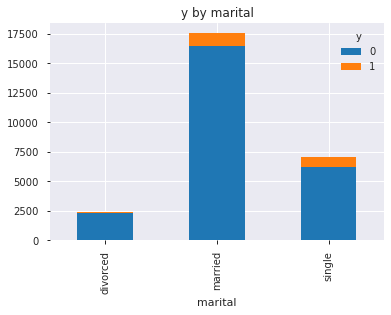

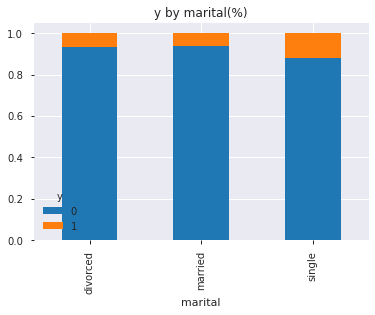

In [39]:
pd.crosstab(x.marital, x.y).plot(kind='bar', stacked=True, title='y by marital')
pd.crosstab(x.marital, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by marital(%)')

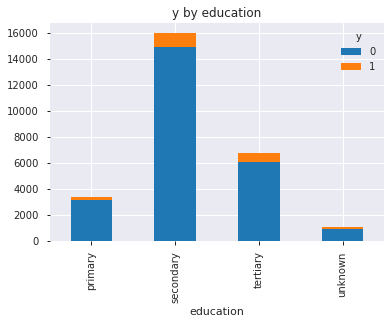

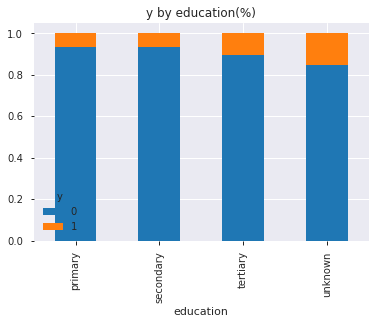

In [40]:
pd.crosstab(x.education, x.y).plot(kind='bar', stacked=True, title='y by education')
pd.crosstab(x.education, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by education(%)')

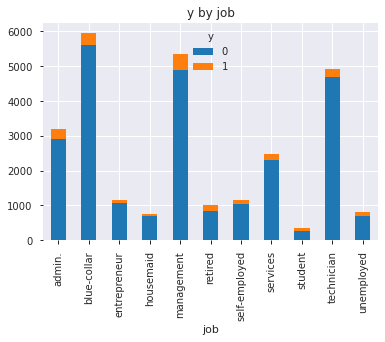

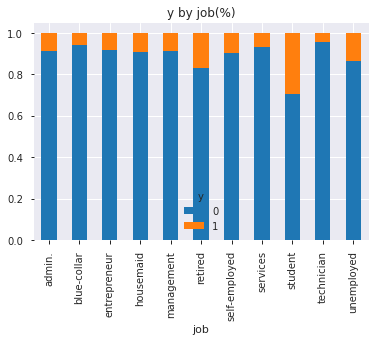

In [41]:
pd.crosstab(x.job, x.y).plot(kind='bar', stacked=True, title='y by job')
pd.crosstab(x.job, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by job(%)')

In [42]:
x['job'].value_counts()

blue-collar      5957
management       5346
technician       4915
admin.           3187
services         2471
self-employed    1163
entrepreneur     1155
retired          1004
unemployed        795
housemaid         754
student           353
Name: job, dtype: int64

In [43]:
test_df['job'].value_counts()

blue-collar      4086
management       3527
technician       3213
admin.           2152
services         1721
entrepreneur      729
self-employed     727
retired           657
unemployed        511
housemaid         496
student           230
unknown             1
Name: job, dtype: int64

In [44]:
test_df[test_df['job'] == 'unknown']

,id,age,job,marital,education,default,balance,housing,loan,contact,...,month,duration,campaign,pdays,previous,poutcome,month_class,day_class,duration_class,age_class
10810,10810,29,unknown,married,unknown,no,10997,no,no,cellular,...,8,158,1,762,0,unknown,2,1,2,0


In [45]:
find_df = x[
            (26 <= x['age'])
          &(x['age'] <= 32)
          & (x['marital'] == 'married')
          & (x['default'] == 'no')
          & (x['housing'] == 'no')
          & (x['loan'] == 'no')
          & (9000 <= x['balance'])
          & (x['balance'] <= 12000)
         ]

print(find_df['job'].value_counts())

management       7
services         6
technician       6
admin.           6
blue-collar      5
self-employed    5
unemployed       4
housemaid        3
retired          2
entrepreneur     2
student          1
Name: job, dtype: int64


In [46]:
find_df.groupby('job').median()['balance']

job
admin.           10695.5
blue-collar      10988.0
entrepreneur     11401.0
housemaid         9726.0
management       10963.0
retired          10535.5
self-employed    11319.0
services         11006.0
student          11440.0
technician       10892.0
unemployed        9524.0
Name: balance, dtype: float64

In [47]:
test_df['job'].iloc[10810] = 'management'

del find_df

/home/awax2/miniconda3/envs/lab/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


# <キャンペーン関連>

In [48]:
train_data[((train_data['pdays'] == -1)
           | (train_data['pdays'] == 0))
           & (train_data['y'] == 1)]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7644,7644,33,management,single,tertiary,no,73824,no,no,cellular,18,aug,158,2,0,0,unknown,1
8291,8291,33,management,single,tertiary,no,29816,no,no,cellular,20,aug,158,1,-1,0,unknown,1
15892,15892,32,technician,single,unknown,no,98163,yes,no,unknown,16,may,152,1,0,0,unknown,1


In [49]:
train_data[((train_data['pdays'] == -1)
           | (train_data['pdays'] == 0))].count()['id']

59

In [50]:
tmp_x = copy(train_data)
tmp_test = copy(test_data)

x['pdays'] = [days // 30 for days in tmp_x.pdays]
test_df['pdays'] = [days // 30 for days in tmp_test.pdays]

del tmp_x, tmp_test

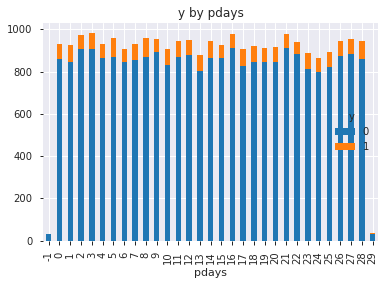

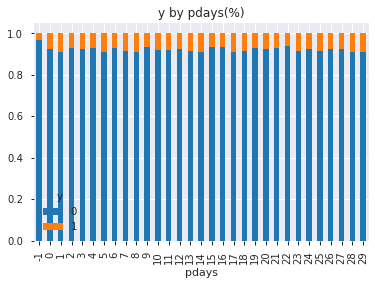

In [51]:
pd.crosstab(x.pdays, x.y).plot(kind='bar', stacked=True, title='y by pdays')
pd.crosstab(x.pdays, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by pdays(%)')

In [52]:
x[['previous', 'y']].groupby(['previous'], as_index=False).mean().sort_values(by='previous')

,previous,y
0,0,0.067594
1,1,0.118280
2,2,0.454380
3,3,0.308824


In [53]:
x[['campaign', 'y']].groupby(['campaign'], as_index=False).mean().sort_values(by='campaign')

,campaign,y
0,1,0.086571
1,2,0.067179
2,3,0.084756
3,4,0.051471
4,5,0.000000


In [54]:
x[x['campaign'] == 5]

,id,age,job,marital,education,default,balance,housing,loan,contact,...,duration,campaign,pdays,previous,poutcome,y,month_class,day_class,duration_class,age_class
10545,10545,30,management,single,tertiary,no,15734,no,no,cellular,...,2,5,27,0,unknown,0,2,1,1,0


In [55]:
def campaign_contact1(campaign):
    a = ''
    if campaign >= 1:
        a = 0
    else:
        a = 0
    return a

In [56]:
def campaign_contact2(campaign):
    a = ''
    if campaign == 0:
        a = 0
    elif campaign == 1:
        a = 1
    elif campaign == 2:
        a = 2
    elif campaign == 3:
        a = 3
    else:
        a = 4
    return a

In [57]:
x['campaign_contact'] = x['campaign'].map(campaign_contact1)
test_df['campaign_contact'] = test_df['campaign'].map(campaign_contact1)

In [58]:
x[['campaign_contact', 'y']].groupby(['campaign_contact'], as_index=False).mean().sort_values(by='campaign_contact')

,campaign_contact,y
0,0,0.077934


In [59]:
x[['poutcome', 'y']].groupby(['poutcome'], as_index=False).mean().sort_values(by='poutcome')

,poutcome,y
0,failure,0.043798
1,other,0.048426
2,success,0.679039
3,unknown,0.071085


In [60]:
x['success'] = [1 if i == 'success' else 0 for i in x.poutcome]
test_df['success'] = [1 if i == 'success' else 0 for i in test_df.poutcome]

In [61]:
x[['success', 'y']].groupby(['success'], as_index=False).mean().sort_values(by='success')

,success,y
0,0,0.067600
1,1,0.679039


# <数値変換>

In [62]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27100 entries, 0 to 27099
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                27100 non-null  int64 
 1   age               27100 non-null  int64 
 2   job               27100 non-null  object
 3   marital           27100 non-null  object
 4   education         27100 non-null  object
 5   default           27100 non-null  object
 6   balance           27100 non-null  int64 
 7   housing           27100 non-null  object
 8   loan              27100 non-null  object
 9   contact           27100 non-null  object
 10  day               27100 non-null  int64 
 11  month             27100 non-null  int64 
 12  duration          27100 non-null  int64 
 13  campaign          27100 non-null  int64 
 14  pdays             27100 non-null  int64 
 15  previous          27100 non-null  int64 
 16  poutcome          27100 non-null  object
 17  y           

In [63]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18050 entries, 0 to 18049
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                18050 non-null  int64 
 1   age               18050 non-null  int64 
 2   job               18050 non-null  object
 3   marital           18050 non-null  object
 4   education         18050 non-null  object
 5   default           18050 non-null  object
 6   balance           18050 non-null  int64 
 7   housing           18050 non-null  object
 8   loan              18050 non-null  object
 9   contact           18050 non-null  object
 10  day               18050 non-null  int64 
 11  month             18050 non-null  int64 
 12  duration          18050 non-null  int64 
 13  campaign          18050 non-null  int64 
 14  pdays             18050 non-null  int64 
 15  previous          18050 non-null  int64 
 16  poutcome          18050 non-null  object
 17  month_class 

In [64]:
drop_col = ['month', 'day', 'duration', 'age', 'campaign', 'poutcome']

x = x.drop(columns=drop_col)

train_df = train_data.drop(columns=drop_col)
test_df = test_df.drop(columns=drop_col)

In [65]:
main_df = pd.concat([x, test_df], ignore_index=True)

In [66]:
num_features = ['balance']

for col in num_features:
    scaler = StandardScaler()
    scaler.fit(np.array(main_df[col].values).reshape(-1, 1))
    x[col] = scaler.transform(np.array(train_df[col].values).reshape(-1, 1))
    
for col in num_features:
    scaler = StandardScaler()
    scaler.fit(np.array(main_df[col].values).reshape(-1, 1))
    test_df[col] = scaler.transform(np.array(test_df[col].values).reshape(-1, 1))

In [67]:
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
               'contact']

for col in cat_features:
    cat = set(x[col].unique().tolist() + test_df[col].unique().tolist())
    
    x[col] = pd.Categorical(x[col], categories=cat)
    test_df[col] = pd.Categorical(test_df[col], categories=cat)

In [68]:
x = pd.get_dummies(x, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

In [69]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27100 entries, 0 to 27099
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  27100 non-null  int64  
 1   balance             27100 non-null  float64
 2   pdays               27100 non-null  int64  
 3   previous            27100 non-null  int64  
 4   y                   27100 non-null  int64  
 5   month_class         27100 non-null  int64  
 6   day_class           27100 non-null  int64  
 7   duration_class      27100 non-null  int64  
 8   age_class           27100 non-null  int64  
 9   campaign_contact    27100 non-null  int64  
 10  success             27100 non-null  int64  
 11  job_self-employed   27100 non-null  uint8  
 12  job_management      27100 non-null  uint8  
 13  job_admin.          27100 non-null  uint8  
 14  job_technician      27100 non-null  uint8  
 15  job_retired         27100 non-null  uint8  
 16  job_

In [70]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18050 entries, 0 to 18049
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  18050 non-null  int64  
 1   balance             18050 non-null  float64
 2   pdays               18050 non-null  int64  
 3   previous            18050 non-null  int64  
 4   month_class         18050 non-null  int64  
 5   day_class           18050 non-null  int64  
 6   duration_class      18050 non-null  int64  
 7   age_class           18050 non-null  int64  
 8   campaign_contact    18050 non-null  int64  
 9   success             18050 non-null  int64  
 10  job_self-employed   18050 non-null  uint8  
 11  job_management      18050 non-null  uint8  
 12  job_admin.          18050 non-null  uint8  
 13  job_technician      18050 non-null  uint8  
 14  job_retired         18050 non-null  uint8  
 15  job_unemployed      18050 non-null  uint8  
 16  job_

In [71]:
x.to_csv('dataset/train_01.csv', index=False)
test_df.to_csv('dataset/test_01.csv', index=False)